#Map data from power monitor and door to sensor box stuff

In [1]:
import numpy as np
import pandas as pd

from datetime import datetime
from datetime import timedelta

#Plotting
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import dates as mdates
from matplotlib.ticker import LinearLocator

##Create example data set

In [2]:
data = [
    ['2015-07-03 07:00:00', 1],
    ['2015-07-03 07:02:00', 0],
    ['2015-07-03 07:05:00', 1],
    ['2015-07-03 07:10:00', 0],
    ]

tp = [
        '2015-07-03 07:00:00',
        '2015-07-03 07:01:00',
        '2015-07-03 07:02:00',
        '2015-07-03 07:03:00',
        '2015-07-03 07:04:00',
        '2015-07-03 07:05:00',
        '2015-07-03 07:06:00',
        '2015-07-03 07:07:00',
        '2015-07-03 07:08:00',
        '2015-07-03 07:09:00',
        '2015-07-03 07:10:00',
    ]

for line in data:
    line[0] = datetime.strptime(line[0], "%Y-%m-%d %H:%M:%S")
    
tp = [datetime.strptime(line, "%Y-%m-%d %H:%M:%S") for line in tp]

**Mapping example input to example timestamps:**

In [3]:
out,j = [],0
for i in range(len(tp)):
    if tp[i] < data[j+1][0]:
        #print i,j
        out.append([tp[i],data[j][1]])
    else:
        out.append([tp[i],data[j+1][1]])
        j += 1

print [line[1] for line in out]

[1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0]


##Random simulated kettle data

In [2]:
n = 5 #number of times kettle is used
time_on = timedelta(minutes=2) #amount of time kettle is on

#random date input
ye = np.array([2015] * n)
mo = np.array([7] * n)
da = np.random.randint(2,3,n)
ho = np.random.randint(0,24,n)
mi = np.random.randint(0,60,n)

rd_date=[]
for i in range(n):
    rd_date.append(datetime(ye[i],mo[i],da[i],ho[i],mi[i]))
    rd_date.append(datetime(ye[i],mo[i],da[i],ho[i],mi[i])+time_on)

rd_date_sorted = np.sort(rd_date)

on_off = np.array(n*[1,0], dtype=int)

kettle = pd.DataFrame(on_off,index=rd_date_sorted,columns=['kettle'])
print kettle

                     kettle
2015-07-02 01:05:00       1
2015-07-02 01:07:00       0
2015-07-02 04:02:00       1
2015-07-02 04:04:00       0
2015-07-02 20:29:00       1
2015-07-02 20:31:00       0
2015-07-02 21:45:00       1
2015-07-02 21:47:00       0
2015-07-02 23:45:00       1
2015-07-02 23:47:00       0


In [3]:
#example timestamps for a day
delta = 5
m = 24*60/delta
start = datetime(2015,7,2,0,0)
sequence = [start]

for i in range(1,m):
    sequence.append(start+i*timedelta(minutes=delta))

#dataframe with random variable
df = pd.DataFrame(np.random.random(size=len(sequence)),index=sequence,columns=["random"])
print df.head()

                       random
2015-07-02 00:00:00  0.812067
2015-07-02 00:05:00  0.608861
2015-07-02 00:10:00  0.893104
2015-07-02 00:15:00  0.559244
2015-07-02 00:20:00  0.085608


##Mapping simulated kettle data to example data-frame

In [4]:
out,j = np.zeros(len(df.index)),0

for i in range(len(df.index)):
    #print i,j
    if df.index[i] < kettle.index[j] and kettle["kettle"][j] == 1:
        continue
        
    elif df.index[i] < kettle.index[j] and kettle["kettle"][j] == 0:
        out[i] = 1
    
    else:
        out[i] = kettle["kettle"][j]
        
        if j < len(kettle.index)-1: 
            j += 1
        else:
            continue

df["kettle"] = out
print df["kettle"][40:70]

2015-07-02 03:20:00    0
2015-07-02 03:25:00    0
2015-07-02 03:30:00    0
2015-07-02 03:35:00    0
2015-07-02 03:40:00    0
2015-07-02 03:45:00    0
2015-07-02 03:50:00    0
2015-07-02 03:55:00    0
2015-07-02 04:00:00    0
2015-07-02 04:05:00    1
2015-07-02 04:10:00    0
2015-07-02 04:15:00    0
2015-07-02 04:20:00    0
2015-07-02 04:25:00    0
2015-07-02 04:30:00    0
2015-07-02 04:35:00    0
2015-07-02 04:40:00    0
2015-07-02 04:45:00    0
2015-07-02 04:50:00    0
2015-07-02 04:55:00    0
2015-07-02 05:00:00    0
2015-07-02 05:05:00    0
2015-07-02 05:10:00    0
2015-07-02 05:15:00    0
2015-07-02 05:20:00    0
2015-07-02 05:25:00    0
2015-07-02 05:30:00    0
2015-07-02 05:35:00    0
2015-07-02 05:40:00    0
2015-07-02 05:45:00    0
Name: kettle, dtype: float64


(0, 1)

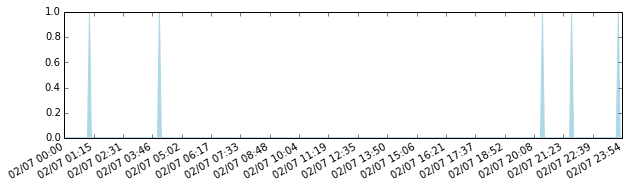

In [5]:
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(10,2.5))

axs.fill_between(df.index,0,df["kettle"],color="lightblue")
#axs[1].fill_between(df.index,0,df["kettle"],color="lightblue")

hfmt = mdates.DateFormatter('%d/%m %H:%M')

fig.autofmt_xdate()
axs.xaxis.set_major_locator(LinearLocator(numticks=20))
axs.xaxis.set_major_formatter(hfmt)
axs.set_ylim(0,1)

##Merge simulated kettle data with a real dataset from sensorbox

In [6]:
import simplejson as json
import urllib2

link="http://109.237.25.161/particle/events?start_date=2015-07-02 03:00:00&end_date=2015-07-02 23:00:00&device=53ff6d066667574831402467"
decoded_json = json.loads(urllib2.urlopen(link).read())['events']

date_format = '%Y-%m-%d %H:%M:%S'
dat = []
timestamp = []

for line in decoded_json:
    buf = [x.strip() for x in line['data'].split(",")]
    
    if len(buf)==5:
            dat.append(buf)
            timestamp.append(datetime.strptime(line['timestamp'],date_format))
    elif len(buf)==2:
            try:
                dat[-1].append(buf[0])
                dat[-1].append(buf[1])
            except IndexError:
                continue
    else:
            continue

print "Data has been fetched.\n"

params = ["temp","light","noise_max","noise_av","noise_var","pir_per","pir_num"]

df = pd.DataFrame(dat, index=timestamp, columns=params)
df = df.convert_objects(convert_numeric=True)

print "Data has been added to a pandas dataframe:\n"
print df.describe()

Data has been fetched.

Data has been added to a pandas dataframe:

               temp         light     noise_max      noise_av     noise_var  \
count  10051.000000  10051.000000  10051.000000  10051.000000  10051.000000   
mean      30.363805   1920.207044   2111.177196   2068.881027    211.814367   
std        0.665050   1085.219351     80.083515      0.838277   1698.511513   
min       29.300000    341.000000   2072.000000   2054.500000      1.900000   
25%       29.800000    708.000000   2080.000000   2068.700000      4.100000   
50%       30.300000   2068.000000   2093.000000   2068.900000     10.500000   
75%       30.900000   2829.000000   2118.000000   2069.200000     89.800000   
max       32.400000   3366.000000   3298.000000   2084.100000  66404.300000   

            pir_per       pir_num  
count  10030.000000  10030.000000  
mean       5.192642     11.026221  
std       15.628701     31.660954  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50% 

In [7]:
out,j = np.zeros(len(df.index)),0

for i in range(len(df.index)):
    #print i,j
    if df.index[i] < kettle.index[j] and kettle["kettle"][j] == 1:
        continue
        
    elif df.index[i] < kettle.index[j] and kettle["kettle"][j] == 0:
        out[i] = 1
    
    else:
        out[i] = kettle["kettle"][j]
        
        if j < len(kettle.index)-1: 
            j += 1
        else:
            continue

df["kettle"] = out
#print df["kettle"][40:60]

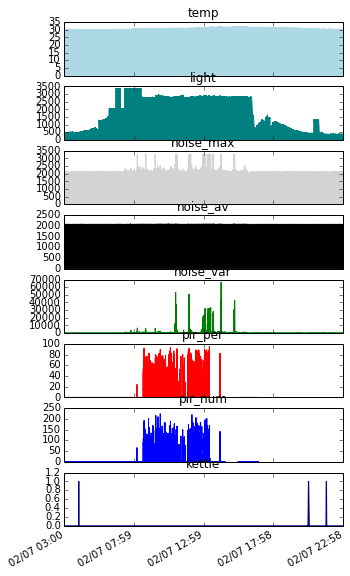

In [8]:
cols = ['lightblue','teal','lightgray','black','green','red','blue','darkblue']
para = ["temp","light","noise_max","noise_av","noise_var","pir_per","pir_num","kettle"]

fig, axs = plt.subplots(len(para), 1, sharex=True, sharey=False, figsize=(5,10))

for i in range(len(para)):
    axs[i].fill_between(df.index,0,df[para[i]],color=cols[i])
    axs[i].set_title("{}".format(para[i]))

hfmt = mdates.DateFormatter('%d/%m %H:%M')

fig.autofmt_xdate()
axs[0].xaxis.set_major_locator(LinearLocator(numticks=5))
axs[0].xaxis.set_major_formatter(hfmt)
#axs[0].set_ylim(0,1)